In [1]:
#1. Import the required libraries and read the dataset.
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as mp
import math
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
import warnings
warnings.filterwarnings('ignore')

In [4]:
#2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.
fifa_df = pd.read_csv('fifa.csv')
fifa_df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [13]:
#Displaying shape
print('Number of rows:',fifa_df.shape[0])
print('Number of columns=:',fifa_df.shape[1])

Number of rows: 18207
Number of columns=: 57


In [10]:
#3. Drop the columns which you think redundant for the analysis.
columns_to_drop = ['Photo', 'Flag', 'Club Logo']
fifa_df.drop(columns=columns_to_drop, inplace=True)

In [11]:
fifa_df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [14]:
#checking for duplicate records
fifa_df[fifa_df.duplicated()]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause


In [15]:
#4. Convert the columns "Value", "Wage", "Release Clause" to float datatype after getting rid of currency symbol and suffix.
#- Note: When the record/entry has "M"(indicates millions) as suffix you need to multiply that value with 1000000
#- When the record/entry has "K"(indicates thousands) as suffix you need to multiply that value with 1000


In [16]:
def clean_currency(x):
    if isinstance(x,str):
        return(x.replace('€','').replace('.','').replace('M','000000').replace('K','000'))
    return(x)

In [17]:
fifa_df['Release Clause'] = fifa_df['Release Clause'].apply(clean_currency).astype('float')
fifa_df['Value'] = fifa_df['Release Clause'].apply(clean_currency).astype('float')
fifa_df['Wage'] = fifa_df['Release Clause'].apply(clean_currency).astype('float')

In [18]:
fifa_df[:5]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,2.265000e+09,2.265000e+09,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2.265000e+09
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,1.271000e+09,1.271000e+09,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1.271000e+09
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,2.281000e+09,2.281000e+09,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,2.281000e+09
3,193080,De Gea,27,Spain,91,93,Manchester United,1.386000e+09,1.386000e+09,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1.386000e+09
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,1.964000e+09,1.964000e+09,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1.964000e+09


In [19]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     16643 non-null  float64
 8   Wage                      16643 non-null  float64
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

In [20]:
#5.Convert the column "Joined" into integer data type with keeping only the year. 

In [24]:
fifa_df.loc[:,"Joined"]                      #viewing data

0        2004
1        2018
2        2017
3        2011
4        2015
         ... 
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: Joined, Length: 18207, dtype: int32

In [25]:
def clean_joined_int(x):                    #function for cleaning and converting to int data type
    if isinstance(x,str):
        x = x[-4:].strip()
        return(x)
    return(x)

In [26]:
fifa_df['Joined'] = fifa_df['Joined'].apply(clean_joined_int).replace(np.nan, 0).astype(int) #cleaning column "Joined"
fifa_df.loc[:,"Joined"]

0        2004
1        2018
2        2017
3        2011
4        2015
         ... 
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: Joined, Length: 18207, dtype: int32

In [27]:
#6. Convert the column "Contract Valid Until" to pandas datetime type.

In [28]:
#viewing the "Contract Valid Until" column
fifa_df.loc[:,"Contract Valid Until"]

0        2021
1        2022
2        2022
3        2020
4        2023
         ... 
18202    2019
18203    2020
18204    2021
18205    2019
18206    2019
Name: Contract Valid Until, Length: 18207, dtype: object

In [29]:
#Converting to pandas datetime type
fifa_df['Contract Valid Until'] = pd.to_datetime(fifa_df['Contract Valid Until'])
fifa_df.loc[:,"Contract Valid Until"]

0       2021-01-01
1       2022-01-01
2       2022-01-01
3       2020-01-01
4       2023-01-01
           ...    
18202   2019-01-01
18203   2020-01-01
18204   2021-01-01
18205   2019-01-01
18206   2019-01-01
Name: Contract Valid Until, Length: 18207, dtype: datetime64[ns]

In [30]:
#7. The column 'Height' is in inches with a quotation mark, Convert to float with decimal points.

In [32]:
#viewing
fifa_df.loc[:,"Height"]

0         5'7
1         6'2
2         5'9
3         6'4
4        5'11
         ... 
18202     5'9
18203     6'3
18204     5'8
18205    5'10
18206    5'10
Name: Height, Length: 18207, dtype: object

In [33]:
#Converting inches (" 5'11 ")  to float ("71.0") <referrenig 4th option>

def parse_ht(ht):
    if ht == 0:
        return(ht)
    else:
        ht_str = str(ht)
        ht_ = ht_str.split("'")
        ft_ = float(ht_[0])
        in_ = float(ht_[1].replace("\"",""))
        return (12*ft_) + in_

In [34]:
fifa_df['Height'] = fifa_df['Height'].replace(np.nan, 0).apply(parse_ht)

In [35]:
fifa_df.loc[:,"Height"]

0        67.0
1        74.0
2        69.0
3        76.0
4        71.0
         ... 
18202    69.0
18203    75.0
18204    68.0
18205    70.0
18206    70.0
Name: Height, Length: 18207, dtype: float64

In [36]:
#8.The column "Weight" has the suffix as lbs, remove the suffix and convert to float.

In [37]:
fifa_df.loc[:,"Weight"]

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18207, dtype: object

In [38]:
#Defining function to convert object "159lbs" to float "159.0"
def conv_weight_float(x):
    if x == 0:
        return(x)
    else:
        x = x[:3].strip()
        x = float(x)
        return (x)

In [39]:
fifa_df['Weight'] = fifa_df['Weight'].replace(np.nan, 0).apply(conv_weight_float)

In [40]:
fifa_df.loc[:,"Weight"]

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

In [41]:
#9.Check percentage of missing values in each column
missing_percentage = fifa_df.isnull().mean() * 100

In [42]:
# Display columns with their respective missing percentages in descending order
print("Missing Percentage in each column:")
print(missing_percentage.sort_values(ascending=False))

Missing Percentage in each column:
Loaned From                 93.057615
Release Clause               8.590103
Value                        8.590103
Wage                         8.590103
Contract Valid Until         1.587302
Club                         1.323667
Position                     0.329544
Jersey Number                0.329544
GKHandling                   0.263635
GKDiving                     0.263635
Agility                      0.263635
Reactions                    0.263635
Balance                      0.263635
ShotPower                    0.263635
Jumping                      0.263635
Stamina                      0.263635
Strength                     0.263635
LongShots                    0.263635
Aggression                   0.263635
Interceptions                0.263635
Positioning                  0.263635
GKReflexes                   0.263635
GKPositioning                0.263635
Vision                       0.263635
Acceleration                 0.263635
GKKicking      

In [43]:
numeric_columns = fifa_df.select_dtypes(include='number').columns
fifa_df[numeric_columns] = fifa_df[numeric_columns].fillna(fifa_df[numeric_columns].mean())

In [44]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Nationality               18207 non-null  object        
 4   Overall                   18207 non-null  int64         
 5   Potential                 18207 non-null  int64         
 6   Club                      17966 non-null  object        
 7   Value                     18207 non-null  float64       
 8   Wage                      18207 non-null  float64       
 9   Preferred Foot            18159 non-null  object        
 10  International Reputation  18207 non-null  float64       
 11  Weak Foot                 18207 non-null  float64       
 12  Skill Moves       

In [45]:
categorical_columns = fifa_df.select_dtypes(include='object').columns
fifa_df[categorical_columns] = fifa_df[categorical_columns].fillna(fifa_df[categorical_columns].mode().iloc[0])

In [46]:
#10. Plot the distribution of Overall rating for all the players and write your findings.

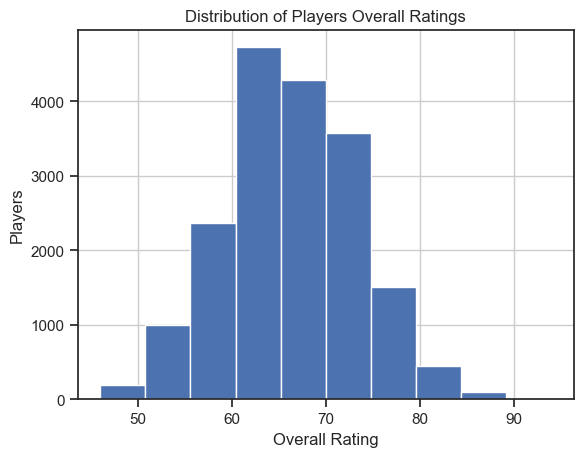

'Findings: #Majority of the players have ratings between 60-80'

In [62]:
ratings = fifa_df["Overall"]
plt.hist(ratings)
plt.xlabel('Overall Rating')
plt.ylabel('Players')
plt.title('Distribution of Players Overall Ratings')
plt.grid(True)
plt.show()
## Findings: 
"Findings: Majority of the players have ratings between 60-80"


In [63]:
#11. Retrieve the names of top20 players based on the Overall rating.
fifa_df.sort_values('Overall', ascending=False)[['Name','Overall']].head(20)

,Name,Overall
0,L. Messi,94
1,Cristiano Ronaldo,94
2,Neymar Jr,92
3,De Gea,91
4,K. De Bruyne,91
5,E. Hazard,91
6,L. Modrić,91
7,L. Suárez,91
8,Sergio Ramos,91
12,D. Godín,90


In [65]:
#12. Generate a dataframe which should include all the information of the Top 20 players based on the Overall rating
fifa_df2 = fifa_df.sort_values('Overall', ascending=False).head(20)

In [66]:
display(fifa_df2)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,2.265000e+09,2.265000e+09,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2.265000e+09
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,1.271000e+09,1.271000e+09,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1.271000e+09
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,2.281000e+09,2.281000e+09,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,2.281000e+09
3,193080,De Gea,27,Spain,91,93,Manchester United,1.386000e+09,1.386000e+09,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1.386000e+09
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,1.964000e+09,1.964000e+09,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1.964000e+09
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,1.721000e+09,1.721000e+09,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,1.721000e+09
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,1.374000e+09,1.374000e+09,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,1.374000e+09
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,1.640000e+08,1.640000e+08,Right,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,1.640000e+08
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,1.046000e+09,1.046000e+09,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,1.046000e+09
12,182493,D. Godín,32,Uruguay,90,90,Atlético Madrid,9.020000e+08,9.020000e+08,Right,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,9.020000e+08


In [67]:
#13. What is the average "Age" and "Wage" of these top 20 players? (use the data frame created in the question 11)
display(fifa_df2[['Age','Wage']].mean())

Age     2.955000e+01
Wage    1.190450e+09
dtype: float64

In [71]:
'''14. Among the top 20 players based on the Overall rating, which player has the highest wage? 
Display the name of the player with his wage'''
fifa_df2.sort_values('Wage', ascending=False)[['Name','Wage']].head(1)

,Name,Wage
2,Neymar Jr,2.281000e+09


In [72]:
'''15. Generate a dataframe which should include the "Player name", "Club
Name", "Wage", and 'Overall rating'.
- i) find the average Overall rating for each club.
- ii) Display the average overall rating of Top10 Clubs using a plot '''

'15. Generate a dataframe which should include the "Player name", "Club\nName", "Wage", and \'Overall rating\'.\n- i) find the average Overall rating for each club.\n- ii) Display the average overall rating of Top10 Clubs using a plot '

In [73]:
fifa_df3 = pd.DataFrame(fifa_df,columns = ['Name','Club',"Wage","Overall"])
display(fifa_df3)

,Name,Club,Wage,Overall
0,L. Messi,FC Barcelona,2.265000e+09,94
1,Cristiano Ronaldo,Juventus,1.271000e+09,94
2,Neymar Jr,Paris Saint-Germain,2.281000e+09,92
3,De Gea,Manchester United,1.386000e+09,91
4,K. De Bruyne,Manchester City,1.964000e+09,91
...,...,...,...,...
18202,J. Lundstram,Crewe Alexandra,1.430000e+05,47
18203,N. Christoffersson,Trelleborgs FF,1.130000e+05,47
18204,B. Worman,Cambridge United,1.650000e+05,47
18205,D. Walker-Rice,Tranmere Rovers,1.430000e+05,47


In [75]:
#i) find the average Overall rating for each club.
fifa_df4 = fifa_df3.groupby('Club')['Overall'].mean()
display(fifa_df4)

Club
 SSV Jahn Regensburg     65.586207
1. FC Heidenheim 1846    65.750000
1. FC Kaiserslautern     63.384615
1. FC Köln               70.785714
1. FC Magdeburg          65.615385
                           ...    
Zagłębie Sosnowiec       60.760000
Çaykur Rizespor          66.900000
Örebro SK                60.481481
Östersunds FK            63.545455
Śląsk Wrocław            62.200000
Name: Overall, Length: 651, dtype: float64

In [76]:
#ii) Display the average overall rating of Top10 Clubs using a plot 
fifa_df5 = fifa_df3.groupby('Club').Overall.mean().sort_values(ascending=False).head(10)
display(fifa_df5)

Club
Juventus               82.280000
Napoli                 80.000000
Inter                  79.750000
Real Madrid            78.242424
Milan                  78.074074
FC Barcelona           78.030303
Paris Saint-Germain    77.433333
Roma                   77.423077
Manchester United      77.242424
SL Benfica             77.000000
Name: Overall, dtype: float64

Text(0.5, 1.0, 'Distribution of Top 10 Clubs Average Overall Ratings')

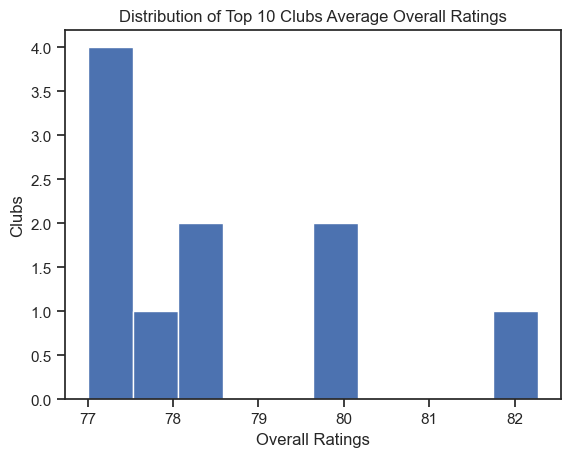

In [77]:
ratings = fifa_df3.groupby('Club').Overall.mean().sort_values(ascending=False).head(10)
plt.hist(ratings)
plt.xlabel('Overall Ratings')
plt.ylabel('Clubs')
plt.title('Distribution of Top 10 Clubs Average Overall Ratings')

In [79]:
'''16. What is the relationship between age and individual potential of theplayer?
Visualize the relationship with appropriate plot and Comment on the same.'''

'16. What is the relationship between age and individual potential of theplayer?\nVisualize the relationship with appropriate plot and Comment on the same.'

'Based on the plot potential declines with age'

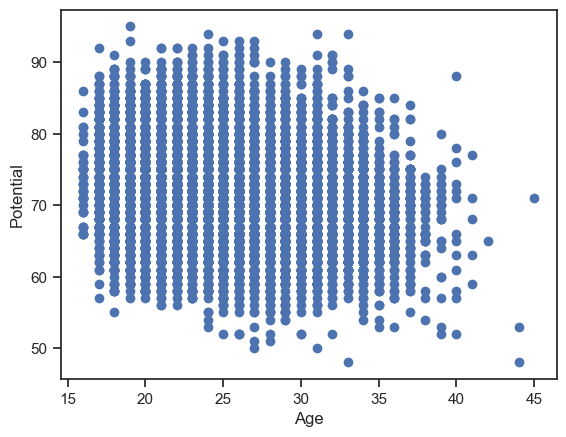

In [82]:
age = fifa_df['Age']
indv_poten = fifa_df['Potential']
plt.xlabel("Age")
plt.ylabel("Potential")
plt.scatter(x=age, y=indv_poten)

'''Based on the plot potential declines with age'''

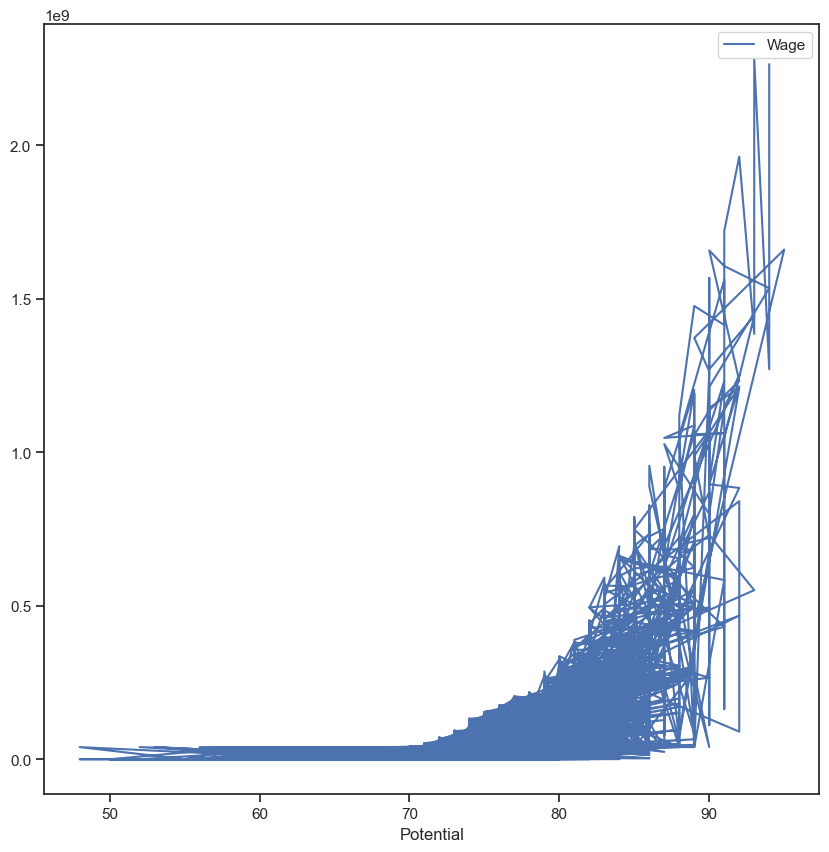

In [83]:
'''17. Which features directly contribute to the wages of the players?
Support your answer with a plot and a metric. (2 points) (hint: use
potential, Overall, value, international reputation, and Release Clause)'''

fifa_df.plot(x="Potential", y=["Wage"], kind="line", figsize=(10,10))
mp.show()

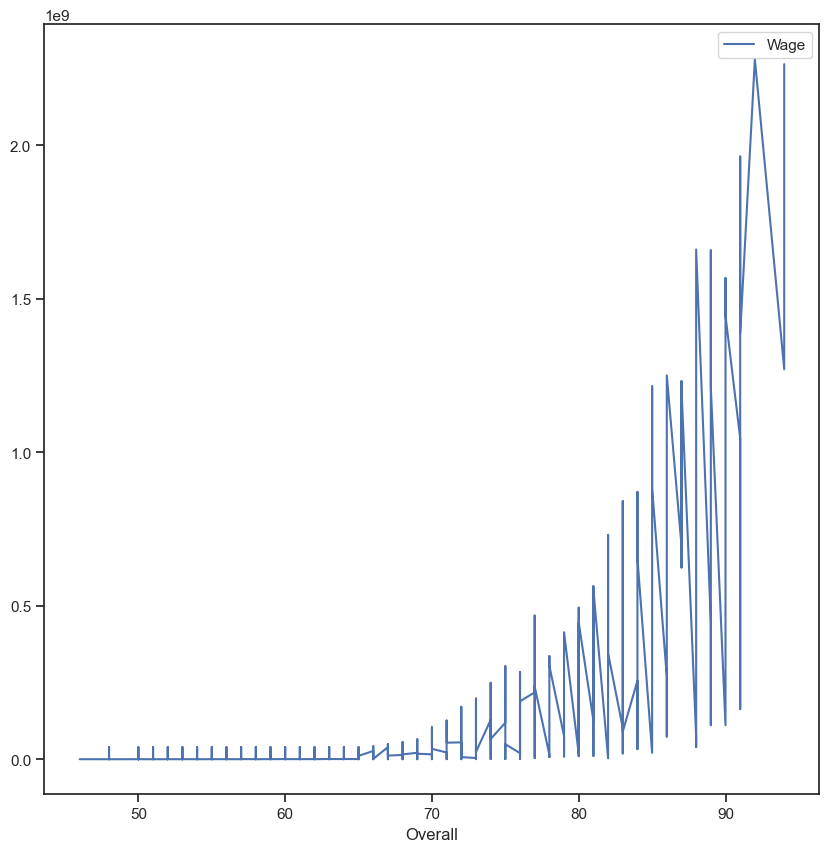

In [84]:
fifa_df.plot(x="Overall", y=["Wage"], kind="line", figsize=(10,10))
mp.show()

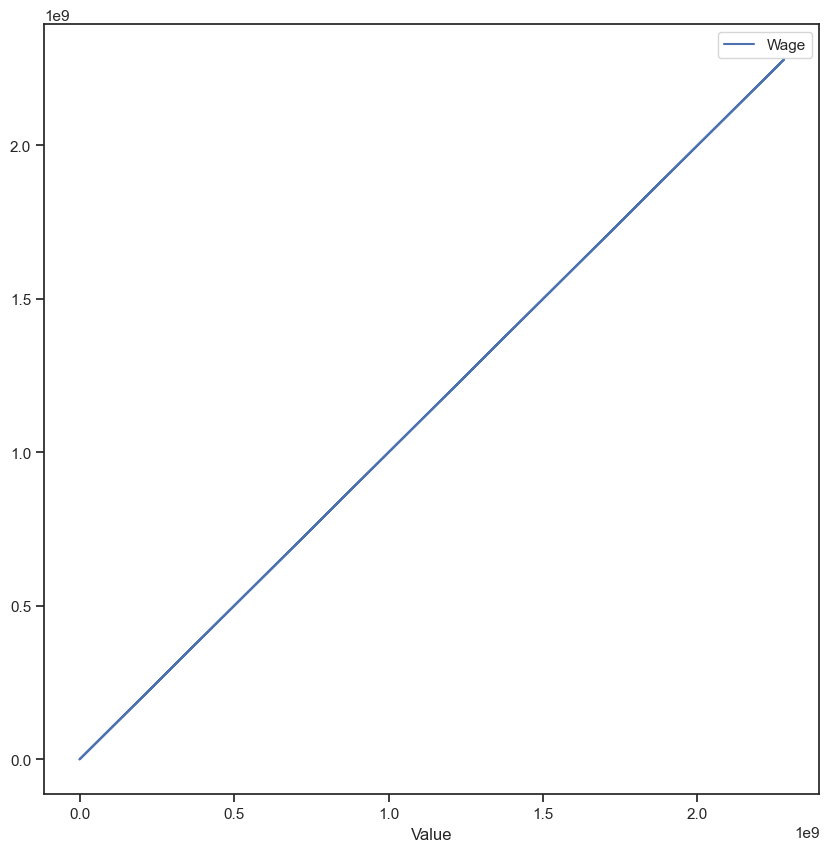

In [85]:
fifa_df.plot(x="Value", y=["Wage"], kind="line", figsize=(10,10))
mp.show()

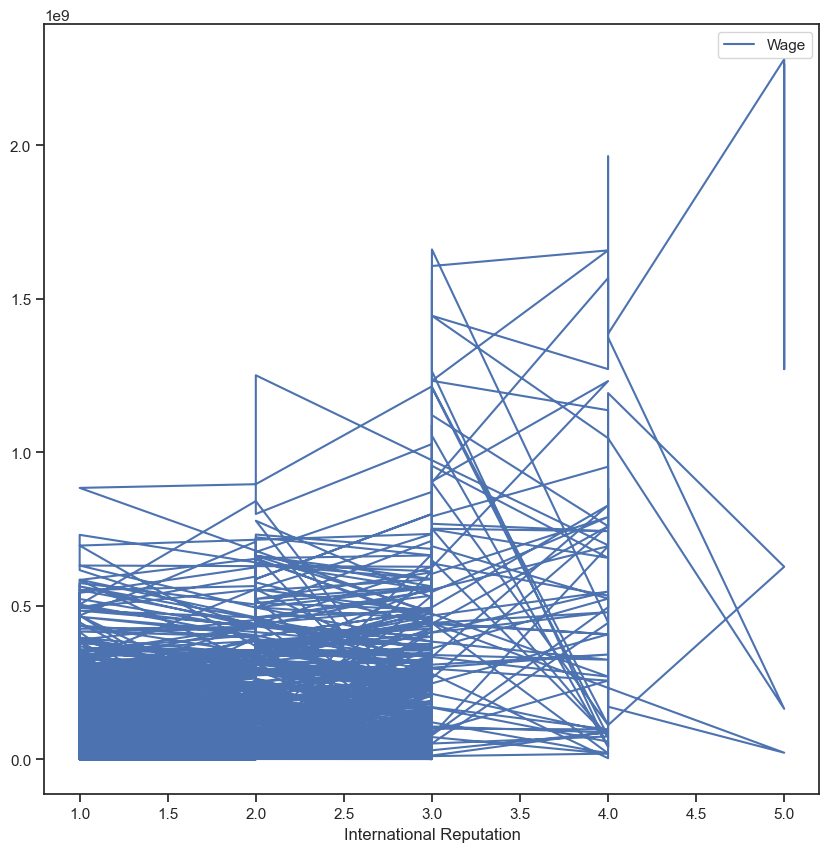

In [86]:
fifa_df.plot(x="International Reputation", y=["Wage"], kind="line", figsize=(10,10))
mp.show()

-From the plots it can be seen that Value and Release Cluase have a linear relationship with Wage

<function matplotlib.pyplot.show(close=None, block=None)>

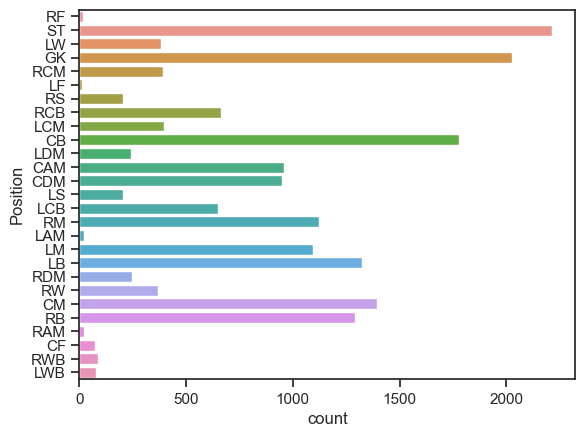

In [91]:
'''18.Find the position in the pitch where the maximum number of players
play and the position where the minimum number of players play? Display
it using a plot.'''
sns.countplot(y='Position', data=fifa_df)
plt.show

-As seen for the plot Position where maximum number of players play is ST and minimum number of players play at RF

In [92]:
'''19. How many players are from the club 'Juventus' and the wage is greater
than 200K? Display all the information of such players.'''

juventus_players = fifa_df[(fifa_df['Club'] == 'Juventus') & (fifa_df['Wage'] > 200)]
print(juventus_players)


           ID               Name  Age         Nationality  Overall  Potential  \
1       20801  Cristiano Ronaldo   33            Portugal       94         94   
15     211110          P. Dybala   24           Argentina       89         94   
24     138956       G. Chiellini   33               Italy       89         89   
64     191043        Alex Sandro   27              Brazil       86         86   
65     190483      Douglas Costa   27              Brazil       86         86   
70     184344         L. Bonucci   31               Italy       86         86   
72     180206          M. Pjanić   28  Bosnia Herzegovina       86         86   
73     177509         M. Benatia   31             Morocco       86         86   
92     186153        W. Szczęsny   28              Poland       85         87   
99     179846         S. Khedira   31             Germany       85         85   
103    170890         B. Matuidi   31              France       85         85   
128    198009           M. P

In [99]:
'''20. Generate a data frame containing top 5 players by Overall rating for
each unique position.'''

sorted_df = fifa_df.sort_values(by='Overall', ascending=False)
top_5_players_by_position = sorted_df.groupby('Position').head(5)
print(top_5_players_by_position)

          ID               Name  Age Nationality  Overall  Potential  \
0     158023           L. Messi   31   Argentina       94         94   
1      20801  Cristiano Ronaldo   33    Portugal       94         94   
2     190871          Neymar Jr   26      Brazil       92         93   
3     193080             De Gea   27       Spain       91         93   
4     192985       K. De Bruyne   27     Belgium       91         92   
...      ...                ...  ...         ...      ...        ...   
1705  230465     Allan Bardinho   26      Brazil       75         75   
2342  230276    Nicolás Formido   30      Brazil       74         74   
2330  230272     Kauã Abranches   34      Brazil       74         74   
2322  230267     Sebas Couteira   30      Brazil       74         74   
2247  230487    Leo Caldeirinha   34      Brazil       74         74   

                     Club         Value          Wage Preferred Foot  ...  \
0            FC Barcelona  2.265000e+09  2.265000e+09     

In [100]:
'''21. What is the average wage one can expect to pay for the top 5 players
in every position? (use the data frame created in Q19)'''

average_wage_by_position = top_5_players_by_position.groupby('Position')['Wage'].mean()

# Display the average wage for the top 5 players in every position
print(average_wage_by_position)

Position
CAM    1.138000e+09
CB     6.050000e+08
CDM    7.976000e+08
CF     3.028000e+08
CM     6.830000e+08
GK     1.165600e+09
LAM    1.153205e+08
LB     6.720000e+08
LCB    7.236000e+08
LCM    7.874000e+08
LDM    5.045205e+08
LF     8.378000e+08
LM     7.254000e+08
LS     3.027205e+08
LW     1.525000e+09
LWB    1.517205e+08
RAM    2.516000e+08
RB     4.734000e+08
RCB    6.866000e+08
RCM    1.107000e+09
RDM    5.142000e+08
RF     6.802000e+08
RM     8.686000e+08
RS     2.580000e+08
RW     9.782000e+08
RWB    2.266000e+08
ST     1.093000e+09
Name: Wage, dtype: float64
